In [18]:
import numpy as np_lib 
import pandas as pd_lib 
import matplotlib.pyplot as plt_lib 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns_lib  

In [20]:
iris_data = sns_lib.load_dataset('iris')
print("First 5 rows of the dataset:")
iris_data.head()

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris_data['species_code'], species_categories = pd_lib.factorize(iris_data['species'])
print("Missing values in each column:")
iris_data.isna().sum()

Missing values in each column:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_code    0
dtype: int64

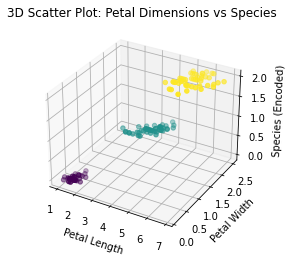

In [22]:
fig = plt_lib.figure()
ax_3d_1 = fig.add_subplot(111, projection='3d')
ax_3d_1.scatter(iris_data.petal_length, iris_data.petal_width, iris_data.species_code, c=iris_data.species_code, cmap='viridis')
ax_3d_1.set_xlabel('Petal Length')
ax_3d_1.set_ylabel('Petal Width')
ax_3d_1.set_zlabel('Species (Encoded)')
plt_lib.title('3D Scatter Plot: Petal Dimensions vs Species')
plt_lib.show()

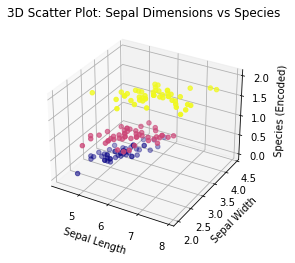

In [24]:
fig = plt_lib.figure()
ax_3d_2 = fig.add_subplot(111, projection='3d')
ax_3d_2.scatter(iris_data.sepal_length, iris_data.sepal_width, iris_data.species_code, c=iris_data.species_code, cmap='plasma')
ax_3d_2.set_xlabel('Sepal Length')
ax_3d_2.set_ylabel('Sepal Width')
ax_3d_2.set_zlabel('Species (Encoded)')
plt_lib.title('3D Scatter Plot: Sepal Dimensions vs Species')
plt_lib.show()

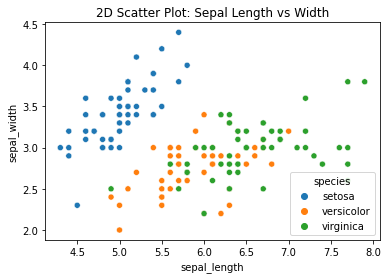

In [25]:
sns_lib.scatterplot(x='sepal_length', y='sepal_width', data=iris_data, hue='species')
plt_lib.title('2D Scatter Plot: Sepal Length vs Width')
plt_lib.show()

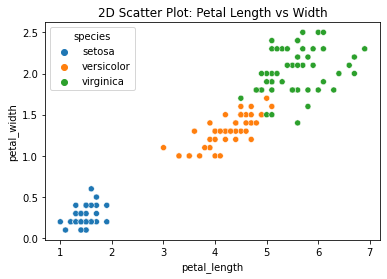

In [26]:
sns_lib.scatterplot(x='petal_length', y='petal_width', data=iris_data, hue='species')
plt_lib.title('2D Scatter Plot: Petal Length vs Width')
plt_lib.show()

In [27]:
from sklearn.cluster import KMeans

cluster_range = range(1, 10)
sse_values = []  # List to store sum of squared errors

for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_data[['petal_length', 'petal_width']])
    sse_values.append(kmeans.inertia_) 

c:\Users\gokulbtech\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


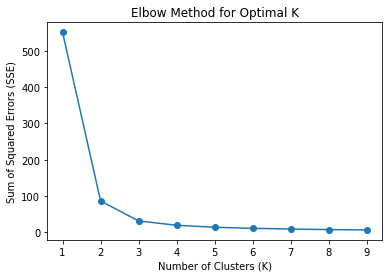

In [28]:
plt_lib.xlabel('Number of Clusters (K)')
plt_lib.ylabel('Sum of Squared Errors (SSE)')
plt_lib.plot(cluster_range, sse_values, marker='o')
plt_lib.title('Elbow Method for Optimal K')
plt_lib.show()

In [29]:
optimal_kmeans = KMeans(n_clusters=3)
predicted_clusters = optimal_kmeans.fit_predict(iris_data[['petal_length', 'petal_width']])

In [30]:
iris_data['cluster_label'] = predicted_clusters
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code,cluster_label
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


In [31]:
from sklearn.metrics import confusion_matrix as cm_func

true_species = iris_data['species_code']
predicted_clusters = iris_data['cluster_label']

conf_matrix = cm_func(true_species, predicted_clusters)

([<matplotlib.axis.YTick at 0x29115a25e50>,
 [Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')])

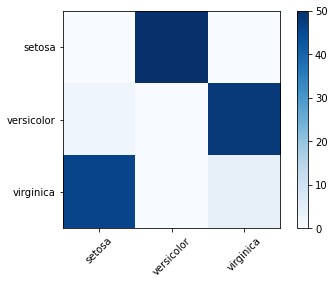

In [32]:
class_labels = np_lib.array(['setosa', 'versicolor', 'virginica'])
plt_lib.imshow(conf_matrix, interpolation='nearest', cmap=plt_lib.cm.Blues)
plt_lib.colorbar()
tick_marks = np_lib.arange(len(class_labels))
plt_lib.xticks(tick_marks, class_labels, rotation=45)
plt_lib.yticks(tick_marks, class_labels)